In [2]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Root path of your project
PROJECT_ROOT = r"C:\Users\aibel\Desktop\Heizel Ann Joseph\Parkinsons Disease"
DATA_ROOT = os.path.join(PROJECT_ROOT, "data", "PaHaW_dataset")
PAHAW_PUBLIC = os.path.join(DATA_ROOT, "PaHaW_public")
METADATA_FILE = os.path.join(DATA_ROOT, "PaHaW_files", "corpus_PaHaW.xlsx")  # FIXED PATH

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_ROOT:", DATA_ROOT)
print("PAHAW_PUBLIC exists?", os.path.exists(PAHAW_PUBLIC))
print("Metadata file exists?", os.path.exists(METADATA_FILE))


PROJECT_ROOT: C:\Users\aibel\Desktop\Heizel Ann Joseph\Parkinsons Disease
DATA_ROOT: C:\Users\aibel\Desktop\Heizel Ann Joseph\Parkinsons Disease\data\PaHaW_dataset
PAHAW_PUBLIC exists? True
Metadata file exists? True


In [3]:
# Cell 2 — list top-level entries and first subject folders
import glob, os

print("DATA_ROOT:", DATA_ROOT)
print("--- top entries under DATA_ROOT ---")
for p in sorted(glob.glob(os.path.join(DATA_ROOT, "*"))):
    print("  ", os.path.basename(p))

# list subject folders in PaHaW_public
subj_folders = sorted(glob.glob(os.path.join(PAHAW_PUBLIC, "*")))
print("\nNumber of subject folders in PaHaW_public:", len(subj_folders))
print("First 8 subject folders:")
for f in subj_folders[:8]:
    print("  ", os.path.basename(f))


DATA_ROOT: C:\Users\aibel\Desktop\Heizel Ann Joseph\Parkinsons Disease\data\PaHaW_dataset
--- top entries under DATA_ROOT ---
   PaHaW_files
   PaHaW_matlab
   PaHaW_public

Number of subject folders in PaHaW_public: 75
First 8 subject folders:
   00001
   00002
   00003
   00004
   00005
   00006
   00007
   00008


In [5]:
# Cell 3 — load metadata excel and inspect
metadata = pd.read_excel(METADATA_FILE)
print("metadata shape:", metadata.shape)
print("metadata columns:", list(metadata.columns))
display(metadata.head(8))


metadata shape: (75, 10)
metadata columns: ['ID', 'Nationality', 'Sex', 'Disease', 'PD status', 'Age', 'Dominant hand', 'LED', 'UPDRS V', 'Length of PD']


,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,R,1115.00,2.0,6.0
1,2,Czech,F,PD,ON,78,R,2110.00,2.0,8.0
2,3,Czech,F,PD,ON,69,R,1556.60,2.0,7.0
3,4,Czech,F,PD,ON,79,R,1691.00,2.0,12.0
4,5,Czech,F,PD,ON,69,R,600.00,2.0,2.0
5,6,Czech,F,PD,ON,57,R,1271.66,2.0,9.0
6,7,Czech,F,PD,ON,78,R,666.66,3.0,19.0
7,8,Czech,F,PD,ON,58,R,397.50,1.0,5.0


In [6]:
# Cell 4 — function to read one .svc file (matches MATLAB loader)
import numpy as np
import pandas as pd

def read_svc_file(path, normalize=False):
    """
    Returns pandas DataFrame columns: x,y,time,pen,azim,alt,press
    Matching the MATLAB read_SVC_file you showed earlier.
    """
    data = np.loadtxt(path, skiprows=1)   # numeric rows only
    # File columns appear: Y, X, TS, PEN, AZIM, ALT, PRESS
    Y_coord = data[:, 0]
    X_coord = data[:, 1]
    T = data[:, 2] - np.min(data[:, 2])   # relative time
    PEN = data[:, 3].astype(float)
    AZIM = data[:, 4]
    ALT = data[:, 5]
    PRESS = data[:, 6]
    if normalize:
        X_coord = X_coord - np.min(X_coord)
        Y_coord = Y_coord - np.mean(Y_coord)
    df = pd.DataFrame({
        "x": X_coord,
        "y": Y_coord,
        "time": T,
        "pen": PEN,
        "azim": AZIM,
        "alt": ALT,
        "press": PRESS
    })
    return df

print("read_svc_file defined.")

read_svc_file defined.


In [7]:
# Cell 5 — list all .svc files and map to subject folders + metadata
import os, glob

svc_files = sorted(glob.glob(os.path.join(PAHAW_PUBLIC, "*", "*.svc")))
print("Total .svc files found:", len(svc_files))

# Create a DataFrame mapping file -> subject_id (folder name) -> filename
rows = []
for f in svc_files:
    folder = os.path.basename(os.path.dirname(f))   # e.g. '00001'
    fname = os.path.basename(f)
    rows.append({"subject": folder, "file": f, "fname": fname})
files_df = pd.DataFrame(rows)
print("Unique subjects found in files:", files_df['subject'].nunique())

# show counts per subject for first 8 subjects
counts = files_df.groupby("subject").size().reset_index(name="n_files").sort_values("subject")
display(counts.head(12))

# quick cross-check with metadata IDs (metadata.ID values might be strings or ints)
print("Sample metadata IDs (first 8):", list(metadata['ID'][:8]))


Total .svc files found: 597
Unique subjects found in files: 75


,subject,n_files
0,00001,8
1,00002,8
2,00003,8
3,00004,8
4,00005,8
5,00006,8
6,00007,8
7,00008,8
8,00009,8
9,00010,8


Sample metadata IDs (first 8): [1, 2, 3, 4, 5, 6, 7, 8]


In [8]:
# Cell 6 — pick a sample .svc file (first available) and load
sample_file = svc_files[0]
print("Sample file:", sample_file)

# Show first few raw lines (header + first few numeric lines)
with open(sample_file, "r", errors='ignore') as f:
    for i, line in enumerate(f):
        if i>6: break
        print(f"{i:02d}:", line.strip())

# Parse into DataFrame using loader
df_sample = read_svc_file(sample_file, normalize=True)
print("\nLoaded DataFrame shape:", df_sample.shape)
display(df_sample.head(12))


Sample file: C:\Users\aibel\Desktop\Heizel Ann Joseph\Parkinsons Disease\data\PaHaW_dataset\PaHaW_public\00001\00001__1_1.svc
00: 1772
01: 4161 2474 625877 1 3447 633 78
02: 4164 2472 625884 1 3457 624 124
03: 4166 2472 625892 1 3457 624 162
04: 4167 2471 625899 1 3457 624 212
05: 4168 2471 625907 1 3457 624 266
06: 4169 2470 625914 1 3457 624 312

Loaded DataFrame shape: (1772, 7)


,x,y,time,pen,azim,alt,press
0,1430.0,-75.053047,0.0,1.0,3447.0,633.0,78.0
1,1428.0,-72.053047,7.0,1.0,3457.0,624.0,124.0
2,1428.0,-70.053047,15.0,1.0,3457.0,624.0,162.0
3,1427.0,-69.053047,22.0,1.0,3457.0,624.0,212.0
4,1427.0,-68.053047,30.0,1.0,3457.0,624.0,266.0
5,1426.0,-67.053047,37.0,1.0,3457.0,624.0,312.0
6,1426.0,-66.053047,45.0,1.0,3457.0,624.0,346.0
7,1425.0,-66.053047,52.0,1.0,3457.0,624.0,378.0
8,1425.0,-66.053047,60.0,1.0,3457.0,624.0,420.0
9,1425.0,-66.053047,67.0,1.0,3457.0,624.0,464.0


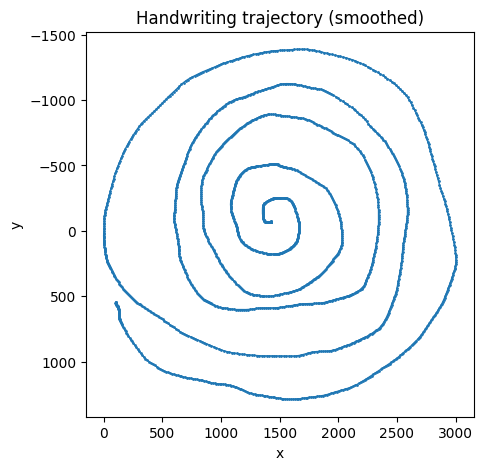

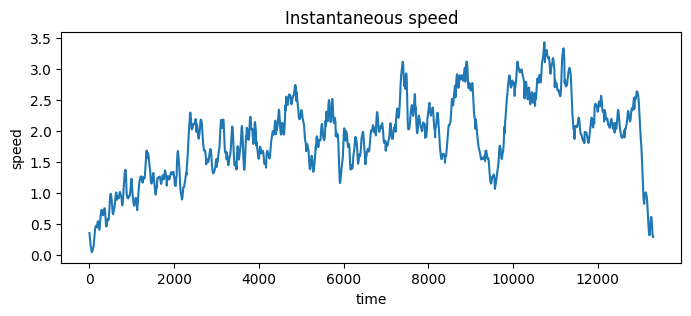

In [9]:
# Cell 7 — plot trajectory and instantaneous speed for df_sample
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df_sample.copy()
if len(df) > 7:
    df['x_s'] = savgol_filter(df['x'], 7, 2)
    df['y_s'] = savgol_filter(df['y'], 7, 2)
else:
    df['x_s'] = df['x']
    df['y_s'] = df['y']

# trajectory
plt.figure(figsize=(5,5))
plt.plot(df['x_s'], df['y_s'], marker='.', linewidth=1, markersize=2)
plt.gca().invert_yaxis()
plt.title("Handwriting trajectory (smoothed)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

# speed
t = df['time'].astype(float)
vx = np.gradient(df['x_s'], t)
vy = np.gradient(df['y_s'], t)
speed = np.sqrt(vx**2 + vy**2)
plt.figure(figsize=(8,3))
plt.plot(t, speed)
plt.title("Instantaneous speed")
plt.xlabel("time"); plt.ylabel("speed")
plt.show()
